# 1. Import Library

In [51]:
!pip install mlflow
!pip install -r requirements.txt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


# 2. Load Dataset

In [52]:
# Load dataset
df = pd.read_csv("/content/dashboard_data.csv")
df.head()


,Age,Gender,MaritalStatus,DistanceFromHome,Department,JobRole,JobLevel,YearsAtCompany,YearsInCurrentRole,MonthlyIncome,StockOptionLevel,PercentSalaryHike,WorkLifeBalance,JobSatisfaction,EnvironmentSatisfaction,PerformanceRating,TrainingTimesLastYear,Attrition
0,41,Male,Divorced,18,Sales,Manager,1,5,7,5900,0,12,3,3,4,3,4,No
1,35,Female,Single,15,R&D,Research Scientist,2,16,2,4973,1,3,3,4,3,3,0,No
2,43,Male,Single,1,Sales,Sales Executive,1,1,6,7266,3,13,3,1,3,3,3,No
3,52,Male,Divorced,11,Sales,Analyst,5,11,3,4517,2,20,3,3,3,3,6,No
4,34,Female,Single,2,Sales,Sales Executive,1,10,5,9159,0,13,4,1,2,3,2,No


# 3. Exploratory Data Analysis

In [53]:
# Info data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Gender                   1470 non-null   object
 2   MaritalStatus            1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Department               1470 non-null   object
 5   JobRole                  1470 non-null   object
 6   JobLevel                 1470 non-null   int64 
 7   YearsAtCompany           1470 non-null   int64 
 8   YearsInCurrentRole       1470 non-null   int64 
 9   MonthlyIncome            1470 non-null   int64 
 10  StockOptionLevel         1470 non-null   int64 
 11  PercentSalaryHike        1470 non-null   int64 
 12  WorkLifeBalance          1470 non-null   int64 
 13  JobSatisfaction          1470 non-null   int64 
 14  EnvironmentSatisfaction  1470 non-null  

In [54]:
# Cek nilai unik pada kolom kategorikal
df.select_dtypes(include='object').nunique()


,0
Gender,2
MaritalStatus,3
Department,3
JobRole,4
Attrition,2


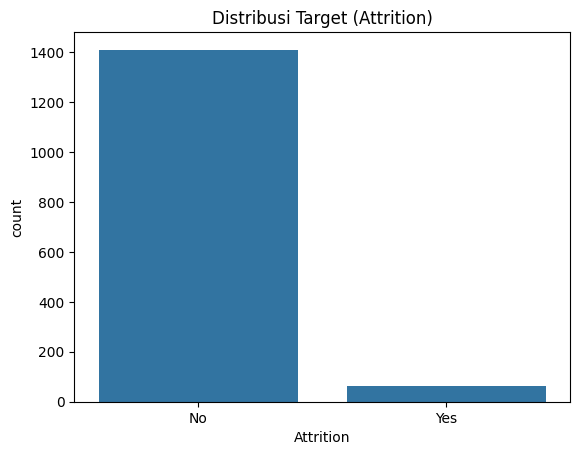

In [55]:
# Distribusi target
sns.countplot(data=df, x='Attrition')
plt.title("Distribusi Target (Attrition)")
plt.show()


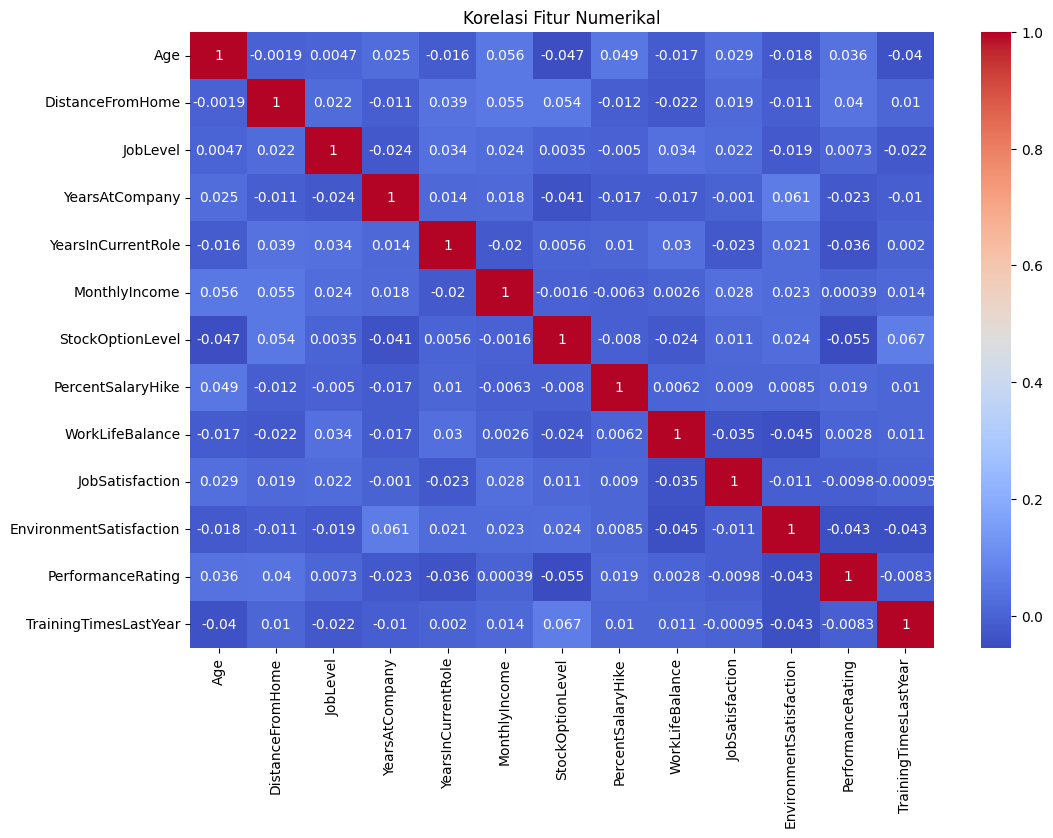

In [56]:
# Korelasi numerik
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerikal")
plt.show()


# 4. Preprocessing

In [57]:
# Encode kolom kategorikal
df_encoded = df.copy()
label_cols = ['Gender', 'MaritalStatus', 'Department', 'JobRole', 'Attrition']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [58]:
# Scaling
scaler = StandardScaler()
scaled_cols = df_encoded.select_dtypes(include=np.number).columns.drop('Attrition')
df_encoded[scaled_cols] = scaler.fit_transform(df_encoded[scaled_cols])


# 5. Save Processed Dataset

In [59]:
# Simpan ke CSV
df_encoded.to_csv("dashboard_data_processed.csv", index=False)
print("dashboard_data_processed.csv")


dashboard_data_processed.csv


# Modelling

In [60]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Aktifkan autolog MLflow
mlflow.sklearn.autolog()

# Load data hasil preprocessing
df = pd.read_csv("dashboard_data_processed.csv")

# Split X dan y
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
with mlflow.start_run():
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9626
